In [1]:
import sklearn,pandas, sklearn.metrics
import numpy as np
from sklearn import datasets

In [14]:
data = pandas.read_csv('data.csv.subset.csv')
data.head()

,user_id,item_id,user_cat_lastday_count,user_item_lastday_count,buy
0,8036273,360815626,13,3,0
1,27751835,244322130,0,0,0
2,98692568,371781541,0,0,0
3,69051488,86334753,0,0,0
4,65801616,117337750,0,0,0


In [15]:
X=np.log(0.3+data[['user_item_lastday_count','user_cat_lastday_count']].as_matrix())
Y=data['buy'].as_matrix()

In [9]:
data_test = pandas.read_csv('data_test.csv')
X_test = np.log(0.3+data_test[['user_item_count','user_item_lastday_count']])
Y_test = data_test['buy']

In [5]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import f1_score
from sklearn.grid_search import GridSearchCV


In [8]:
parms = {
'C':[1],# np.logspace(-6,1,10),
'class_weight':[{0:1,1:2},{0:1,1:10},{0:1,1:30},{0:1,1:100},{0:1,1:300},{0:1,1:1000}]
}
lr = LogisticRegression(C=10,class_weight={0:1,1:1})
clf = GridSearchCV(lr, parms, scoring='f1')

In [5]:
data['buy'].value_counts()

0    3539017
1        574
dtype: int64

In [6]:
counts = data['user_item_lastday_count'].value_counts()

In [36]:
np.corrcoef(data['user_item_count'], data['user_item_lastday_count'])

array([[  1.,  nan],
       [ nan,  nan]])

In [ ]:
clf.fit(X,Y)

In [6]:
clf.intercept_,clf.coef_

AttributeError: 'GridSearchCV' object has no attribute 'intercept_'

In [16]:
import pickle
f = open('model2.model','rb')
clf = pickle.load(f)
f.close()

In [11]:
clf = LogisticRegression(class_weight={0:1,1:100}, C=0.0013)
clf.fit(X,Y)
print clf.intercept_,clf.coef_
print clf.score(X_test,Y_test),np.mean(data_test['buy']==0)
pred = clf.predict(X_test)
print f1_score(Y_test,pred)*100, f1_score(Y, clf.predict(X))*100

[-4.57766365] [[ 0.65020026  1.34236491]]
0.999630403385 0.99992922618
3.64464692483 0.936768149883


In [7]:
print clf.best_score_,clf.best_params_

0.0209094022246 {'C': 0.00021544346900318845, 'class_weight': {0: 1, 1: 100}}


In [17]:
print np.sum(Y)
predX = clf.predict(X)
print np.sum(predX)
print sklearn.metrics.recall_score(Y, predX), sklearn.metrics.precision_score(Y, predX)

302
781
0.0397350993377 0.0153649167734


In [18]:
print f1_score(Y, predX)

0.0221606648199


In [18]:
1/(1/0.326+1/0.000328)

0.00032767031943320836

In [23]:
print np.sum(clf.predict(X_test))

358


In [22]:
print clf.intercept_,clf.coef_

[-4.57766365] [[ 0.65020026  1.34236491]]


In [12]:
y = np.zeros(20)
t = np.linspace(5,100,20)
for i in range(20):
    y[i] = f1_score(Y,X[:,0]>np.log(0.3+t[i]))


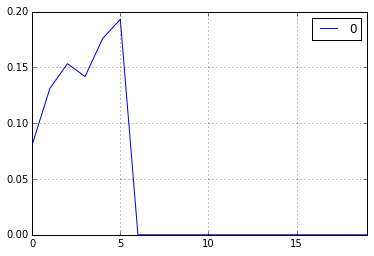

In [13]:
%matplotlib inline
pandas.DataFrame(y*100).plot()

In [16]:
print t[5],y[5]
# print X_test
print f1_score(Y_test,(X_test['user_item_count']>t[3]))

30.0 0.0019305019305
0.0


In [5]:
import pickle
with open('model1.model','rb') as f:
    clf = pickle.load(f)
print clf

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=16,
       param_grid={'C': array([  1.00000e-06,   5.99484e-06,   3.59381e-05,   2.15443e-04,
         1.29155e-03,   7.74264e-03,   4.64159e-02,   2.78256e-01,
         1.66810e+00,   1.00000e+01]), 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 10}, {0: 1, 1: 30}, {0: 1, 1: 100}, {0: 1, 1: 300}, {0: 1, 1: 1000}]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring='f1',
       verbose=0)


In [18]:
print clf.best_score_*100
print clf.best_params_

1.00400405829
{'C': 0.001291549665014884, 'class_weight': {0: 1, 1: 100}}


In [15]:
est = clf.estimator

In [16]:
print clf.score(X,Y)
print clf.predict(X)

0.0194432169686
[0 0 0 ..., 0 0 0]


In [22]:
clf.estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [34]:
data_test['buy'].value_counts()

0    1179196
1        215
dtype: int64

In [47]:
clf.score(X_test,Y_test)

0.99981770561746497

In [49]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
f1_score(Y_test,pred)

0.019891500904159132

In [38]:
np.mean(data_test['buy']==0)

0.99981770561746497

In [23]:
np.mean(pred[:,0]>0.995)

0.99871800415631196

In [65]:
data['buy'].value_counts()

0    3539017
1        574
dtype: int64

In [29]:
data

,user_id,item_id,user_action_count,user_lastday_count,user_buy_count,item_click_count,item_lastday_count,item_buy_count,cat_click_count,cat_buy_count,user_cat_count,user_cat_lastday_count,user_item_count,user_item_lastday_count,buy
0,27751835,244322130,843,0,7,1,0,0,12004,137,150,0,1,0,0
1,98692568,371781541,567,0,12,2,0,0,3969,74,6,0,2,0,0
2,100014756,350273263,1497,66,13,2,0,0,322649,860,119,2,2,0,0
3,48034560,302154307,248,0,9,215,8,1,290767,957,4,0,2,0,0
4,68352416,197974051,3148,72,4,2,0,0,51605,1317,123,0,1,0,0
5,91450392,384935079,1289,94,8,3,0,0,31023,610,17,0,3,0,0
6,68089629,265879503,3084,46,9,154,5,11,56403,948,26,0,2,0,0
7,26047046,57878922,2049,68,2,43,0,1,290767,957,191,2,2,0,0
8,108430412,245000744,6531,266,11,2,0,0,316540,855,245,0,2,0,0
9,14655396,214188424,198,0,1,2,0,0,25715,323,2,0,2,0,0


In [1]:
data_pred = pandas.read_csv('data.csv')
X_pred=np.log(0.3+data_pred[['user_item_count','user_item_lastday_count']])
Y_pred=data_pred['buy']

NameError: name 'pandas' is not defined

In [7]:
np.array([1,2])+4

array([5, 6])

In [8]:
items = pandas.read_csv('tianchi_mobile_recommend_train_item.csv')


In [14]:
tids=items['item_id']

In [30]:
tids[0]

327414838

In [32]:
'327414838' in list(tids)

False

In [14]:
items = pandas.read_csv('tianchi_mobile_recommend_train_item.csv')

In [17]:
nrow = 10000
start = 0
fr = pandas.read_csv('feature.csv',iterator=True)

MemoryError: 

In [25]:
if 0:
    print 111

In [10]:
arr=[1,2,3,4,5,6]
arr[1,2]

TypeError: list indices must be integers, not tuple